In [1]:
# Course - DSC 680 - Applied Data Science 
# Name - Vikas Ranjan
# Final Project 3 - Heart Disease Prediction 
# Date - 8/01/21

## Heart Disease Prediction 

### Problem Statement:

For the final project of this term, I wanted to do work on healthcare domain. Hence, ended up choosing a dataset with attributes relating to heart disease. According to WHO, an estimated 17.9 million people died from heart diseases in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke. Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the United States. Heart disease costs the United States about $219 billion each year from 2014 to 2015. This includes the cost of health care services, medicines, and lost productivity due to death. The early prognosis of heart diseases can help in making decisions on lifestyle changes in high-risk patients and in turn reduce the complications, fatalities, and overall healthcare cost on economy. 

The purpose of this project is to identify the factors that would allow us to predict if a person might get heart disease. Using the classification methods, the intent is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). EDA and statistical analysis will also be performed on the dataset.

In [2]:
# Load necessary libraries
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import calendar
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import scikitplot as skplt

from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the heart disease dataset into a dataframe
heart_df = pd.read_csv("framingham.csv")

In [4]:
# Check the dimension of the data frame
print("The dimension of the table is: ", heart_df.shape)

The dimension of the table is:  (4238, 16)


In [5]:
# Display all columns
pd.set_option('display.max_columns', None)
print(heart_df.head(5))

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [6]:
heart_df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [7]:
# Understand the attributes of the dataset
heart_df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [8]:
# Check if any missing values
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
# Remove the education column from the dataset 
heart_df = heart_df.drop('education', axis = 'columns')

In [10]:
# For the null values, updated the median values
heart_df['cigsPerDay'] = heart_df['cigsPerDay'].fillna(heart_df['cigsPerDay'].median())
heart_df['BPMeds'] = heart_df['BPMeds'].fillna(heart_df['BPMeds'].median())
heart_df['totChol'] = heart_df['totChol'].fillna(heart_df['totChol'].median())
heart_df['BMI'] = heart_df['BMI'].fillna(heart_df['BMI'].median())
heart_df['heartRate'] = heart_df['heartRate'].fillna(heart_df['heartRate'].median())
heart_df['glucose'] = heart_df['glucose'].fillna(heart_df['glucose'].median())

In [11]:
# Check for any missing values in the dataset after the cleanup
heart_df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### Now that dataset has been cleaned up and adjusted, we are ready to perform EDA.

### Exploratory Data Analysis 

In [12]:
# I learnt about pandas profiling, it is an amazing tool for understanding dataset. 
# Therefore I wanted to see it in action on this dataset.
heart_df.profile_report()

Distribution of boolean variables of the dataset
 “1” means “Yes”, “0” means “No”


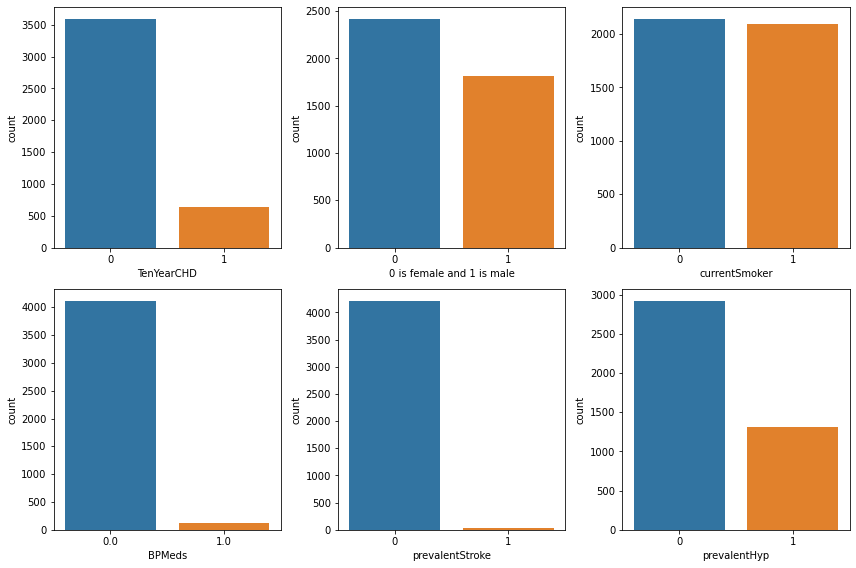

In [13]:
# Plot the distribution of the boolean attributes of the dataset
print("Distribution of boolean variables of the dataset")
print(' “1” means “Yes”, “0” means “No”')

fig, axes = plt.subplots(nrows = 2, ncols = 3,figsize = (12,8))
sns.countplot(heart_df.TenYearCHD, ax = axes[0,0])
sns.countplot(heart_df.male, ax = axes[0,1])
axes[0,1].set_xlabel("0 is female and 1 is male")
sns.countplot(heart_df.currentSmoker, ax = axes[0,2])
sns.countplot(heart_df.BPMeds, ax = axes[1,0])
sns.countplot(heart_df.prevalentStroke, ax = axes[1,1])
sns.countplot(heart_df.prevalentHyp, ax = axes[1,2])
plt.tight_layout()

Distribution of continuous variables


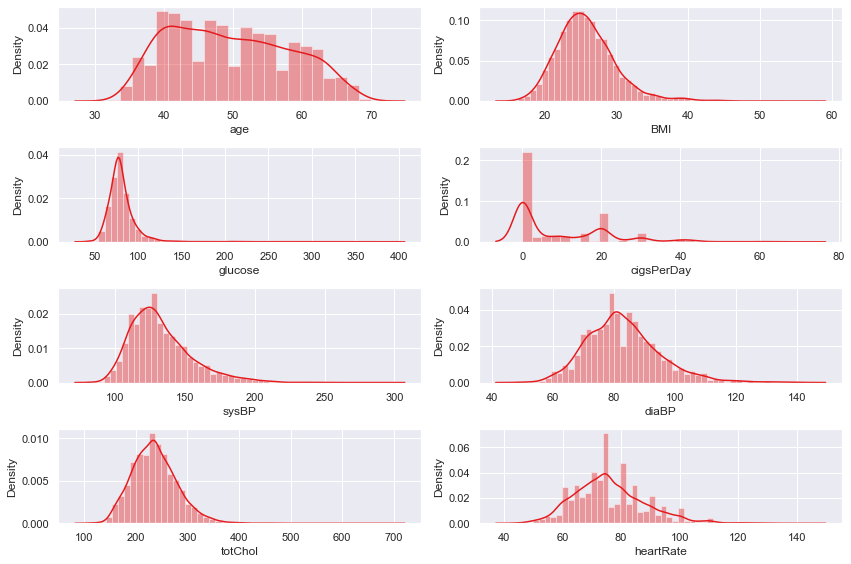

In [14]:
# Plot distribution of all the continuous variables
print("Distribution of continuous variables")

sns.set(style = "darkgrid", palette = 'Set1')
fig,axes = plt.subplots(nrows = 4,ncols = 2,figsize = (12,8))
sns.distplot(heart_df.age, ax = axes[0,0])
sns.distplot(heart_df.BMI, ax = axes[0,1])
sns.distplot(heart_df.glucose, ax = axes[1,0])
sns.distplot(heart_df.cigsPerDay, ax = axes[1,1])
sns.distplot(heart_df.sysBP, ax = axes[2,0])
sns.distplot(heart_df.diaBP, ax = axes[2,1])
sns.distplot(heart_df.totChol, ax = axes[3,0])
sns.distplot(heart_df.heartRate, ax = axes[3,1])
plt.tight_layout()

<AxesSubplot:xlabel='TenYearCHD', ylabel='proportion'>

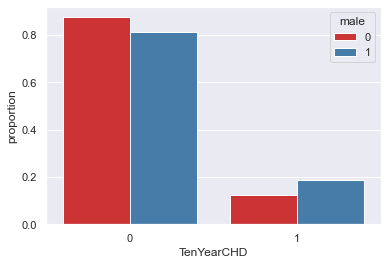

In [15]:
x, y, hue = "TenYearCHD", "proportion", "male"
hue_order = ["Female", "Male"]

(heart_df[x]
 .groupby(heart_df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x = x, y = y, hue = hue))

##### As we can see above, most of the people who don't have a 10-year risk of coronary heart disease are female while the ones who have the risk are generally male.

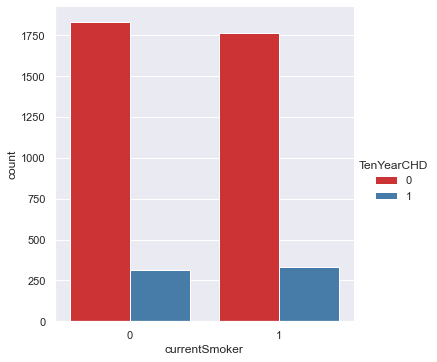

In [16]:
# Smoking impact

sns.catplot(x = "currentSmoker", hue = "TenYearCHD", kind = "count", palette = 'Set1', data = heart_df)

##### As we can see above, smoking status has insignificant effect on the risk in the data.

<AxesSubplot:xlabel='currentSmoker', ylabel='proportion'>

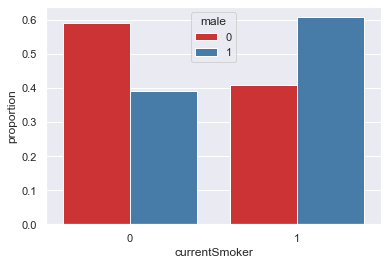

In [17]:
x, y, hue = "currentSmoker", "proportion", "male"
hue_order = ["Male", "Female"]

(heart_df[x]
 .groupby(heart_df[hue])
 .value_counts(normalize = True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x = x, y = y, hue = hue, palette = 'Set1'))

##### The above graph shows the proportion of people in the status smokers and non-smokers while the colors show the gender in each group. In this data, almost 60 percent of people who are smokers are female while more than 60 percent of people who are not smokers are male.

<AxesSubplot:xlabel='TenYearCHD', ylabel='heartRate'>

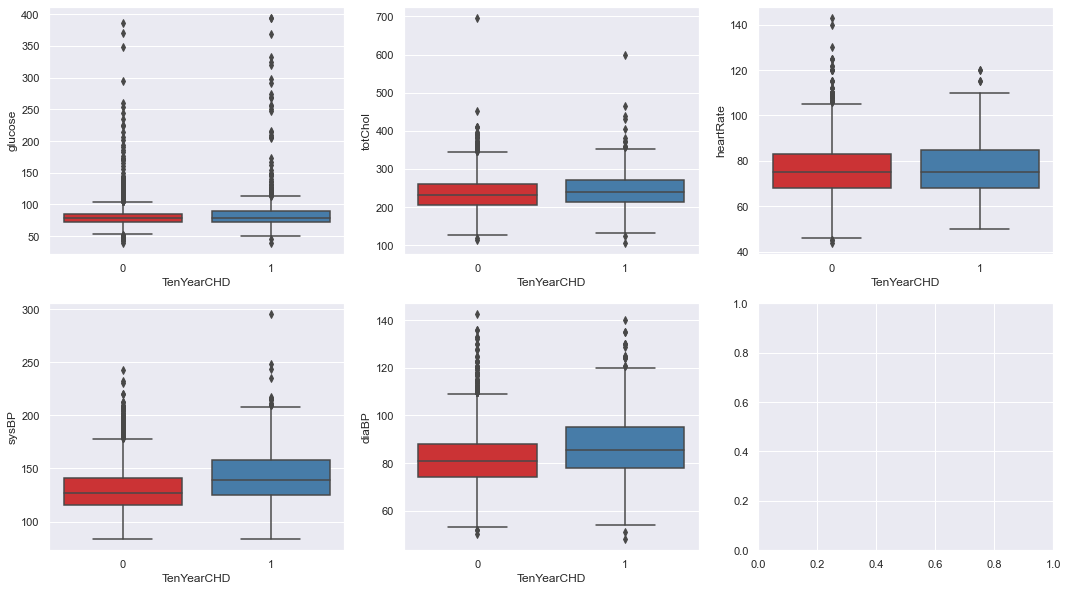

In [18]:
# Box and whisker plot of GLUCOSE, TOTAL CHOLESTEROL, SYSTOLIC BLOOD PRESSURE, DIASTOLIC BLOOD PRESSURE, HEART RATE

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0],data=heart_df, y="glucose", x='TenYearCHD', palette='Set1')
sns.boxplot(ax=axes[0, 1],data=heart_df, y="totChol", x='TenYearCHD', palette='Set1')
sns.boxplot(ax=axes[1, 0],data=heart_df, y="sysBP", x='TenYearCHD', palette='Set1')
sns.boxplot(ax=axes[1, 1],data=heart_df, y="diaBP", x='TenYearCHD', palette='Set1')
sns.boxplot(ax=axes[0, 2],data=heart_df, y="heartRate", x='TenYearCHD', palette='Set1')

- Glucose-10 Year Risk of Coronary Heart Disease: The distributions for both the risk group and the group of people who don't have the risk are almost the same except the third quartile which is greater and the maximum value which is slightly greater for the risk group. Both groups have so many outliers.

- Total Cholesterol-10 Year Risk of Coronary Heart Disease: The distributions for both the risk group and the group of people who don't have the risk are almost the same. Both groups have so many outliers.

- Heart Rate-10 Year Risk of Coronary Heart Disease: The distributions for both the risk group and the group of - people who don't have the risk are almost the same except for the third quartile, minimum and maximum values which are slightly greater for the risk group. Both groups have so many outliers especially the group of people who don't have the risk.

- Systolic Blood Pressure-10 Year Risk of Coronary Heart Disease: In the group that doesn't have a 10-year risk of coronary heart disease, the median is about 130 while in the other group that has a 10-year risk of coronary heart disease it is almost 150. The minimum systolic blood pressure value for both two groups are the same while the maximum value is much higher in the risk group. Also, the first and third quartiles are so much higher in the risk group.

- Diastolic Blood Pressure-10 Year Risk of Coronary Heart Disease: Like systolic blood pressure, diastolic blood pressure's median, max, first quartile, and third quartile values are higher for the risk group.

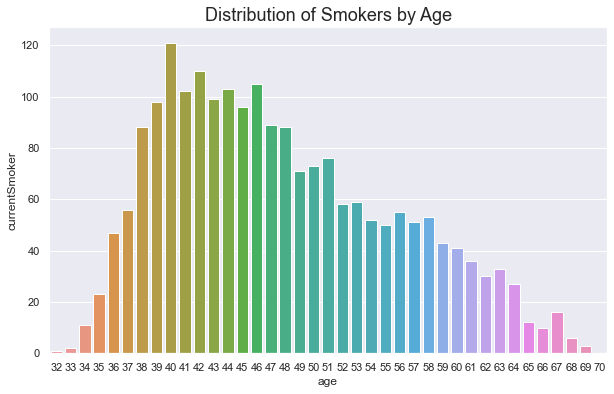

In [19]:
# Group by smokers and plot the distribution by age.
smokers_df = heart_df.groupby("age", as_index = False).currentSmoker.sum()
plt.figure(figsize = (10,6))
sns.barplot(x = smokers_df["age"], y = smokers_df["currentSmoker"])
plt.title("Distribution of Smokers by Age",{'fontsize':18});

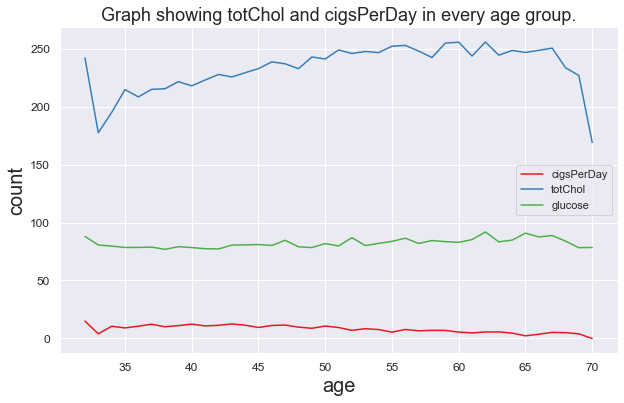

In [20]:
# Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.
chol_df = heart_df.groupby("age").totChol.mean()
glucose_df = heart_df.groupby("age").glucose.mean()
cigs_df = heart_df.groupby("age").cigsPerDay.mean()

plt.figure(figsize = (10,6))
sns.lineplot(data = cigs_df, label = "cigsPerDay")
sns.lineplot(data = chol_df, label = "totChol")
sns.lineplot(data = glucose_df, label = "glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.",{'fontsize':18})
plt.xlabel("age", size = 20)
plt.ylabel("count", size = 20)
plt.xticks(size = 12)
plt.yticks(size = 12);

In [21]:
# Create the correlations matrix
corr_matrix = heart_df.corr()
corr_matrix

male       age  currentSmoker  cigsPerDay    BPMeds  \
male             1.000000 -0.028979       0.197596    0.315630 -0.051545   
age             -0.028979  1.000000      -0.213748   -0.191847  0.120955   
currentSmoker    0.197596 -0.213748       1.000000    0.760239 -0.048358   
cigsPerDay       0.315630 -0.191847       0.760239    1.000000 -0.044675   
BPMeds          -0.051545  0.120955      -0.048358   -0.044675  1.000000   
prevalentStroke -0.004546  0.057655      -0.032988   -0.032244  0.114609   
prevalentHyp     0.005313  0.307194      -0.103260   -0.065046  0.258697   
diabetes         0.015708  0.101258      -0.044295   -0.036150  0.051394   
totChol         -0.069549  0.260105      -0.046466   -0.026976  0.078578   
sysBP           -0.035989  0.394302      -0.130230   -0.088375  0.251503   
diaBP            0.057933  0.206104      -0.107746   -0.056687  0.192356   
BMI              0.081653  0.135174      -0.167161   -0.092211  0.099584   
heartRate       -0.116621 -0.012848       0.062330    0.073853  0.015142   
glucose          0.010073  0.117788      -0.055177   -0.056863  0.049124   
TenYearCHD       0.088428  0.225256       0.019456    0.058859  0.086417   

                 prevalentStroke  prevalentHyp  diabetes   totChol     sysBP  \
male                   -0.004546      0.005313  0.015708 -0.069549 -0.035989   
age                     0.057655      0.307194  0.101258  0.260105  0.394302   
currentSmoker          -0.032988     -0.103260 -0.044295 -0.046466 -0.130230   
cigsPerDay             -0.032244     -0.065046 -0.036150 -0.026976 -0.088375   
BPMeds                  0.114609      0.258697  0.051394  0.078578  0.251503   
prevalentStroke         1.000000      0.074830  0.006949  0.000123  0.057009   
prevalentHyp            0.074830      1.000000  0.077808  0.163054  0.696755   
diabetes                0.006949      0.077808  1.000000  0.040117  0.111283   
totChol                 0.000123      0.163054  0.040117  1.000000  0.207522   
sysBP                   0.057009      0.696755  0.111283  0.207522  1.000000   
diaBP                   0.045190      0.615751  0.050329  0.163888  0.784002   
BMI                     0.024265      0.300510  0.086025  0.114811  0.325161   
heartRate              -0.017674      0.147196  0.048996  0.090537  0.182143   
glucose                 0.018722      0.083571  0.606493  0.045559  0.135136   
TenYearCHD              0.061810      0.177603  0.097317  0.081566  0.216429   

                    diaBP       BMI  heartRate   glucose  TenYearCHD  
male             0.057933  0.081653  -0.116621  0.010073    0.088428  
age              0.206104  0.135174  -0.012848  0.117788    0.225256  
currentSmoker   -0.107746 -0.167161   0.062330 -0.055177    0.019456  
cigsPerDay      -0.056687 -0.092211   0.073853 -0.056863    0.058859  
BPMeds           0.192356  0.099584   0.015142  0.049124    0.086417  
prevalentStroke  0.045190  0.024265  -0.017674  0.018722    0.061810  
prevalentHyp     0.615751  0.300510   0.147196  0.083571    0.177603  
diabetes         0.050329  0.086025   0.048996  0.606493    0.097317  
totChol          0.163888  0.114811   0.090537  0.045559    0.081566  
sysBP            0.784002  0.325161   0.182143  0.135136    0.216429  
diaBP            1.000000  0.376623   0.181257  0.059042    0.145299  
BMI              0.376623  1.000000   0.067520  0.082219    0.074217  
heartRate        0.181257  0.067520   1.000000  0.087315    0.022857  
glucose          0.059042  0.082219   0.087315  1.000000    0.121277  
TenYearCHD       0.145299  0.074217   0.022857  0.121277    1.000000

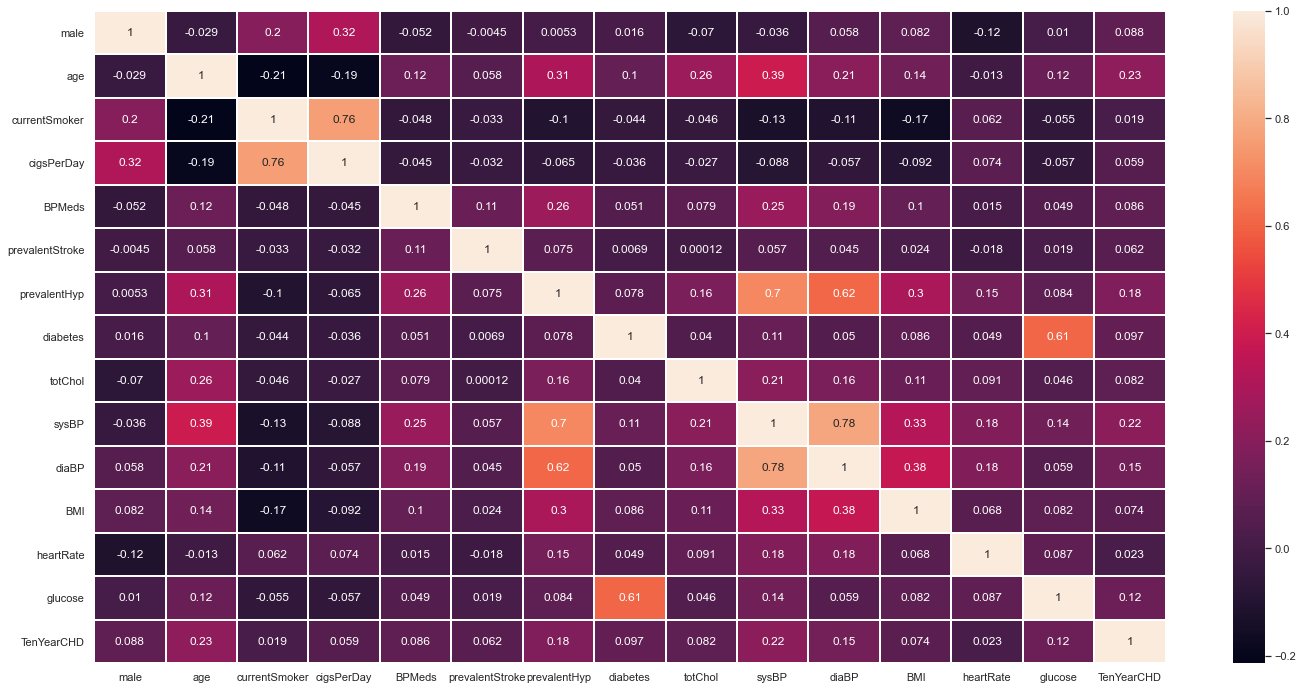

In [22]:
# Heatmap of the corelation 
corr = heart_df.corr()
plt.figure(figsize = (24, 12))
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [23]:
# Check which attributes are corelated.
corr_matrix["TenYearCHD"].sort_values(ascending=False)

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.121277
diabetes           0.097317
male               0.088428
BPMeds             0.086417
totChol            0.081566
BMI                0.074217
prevalentStroke    0.061810
cigsPerDay         0.058859
heartRate          0.022857
currentSmoker      0.019456
Name: TenYearCHD, dtype: float64

**Correlations Analyis - TenYearCHD:**

- The strongest positive correlations of TenYearCHD are with age and sysBP.

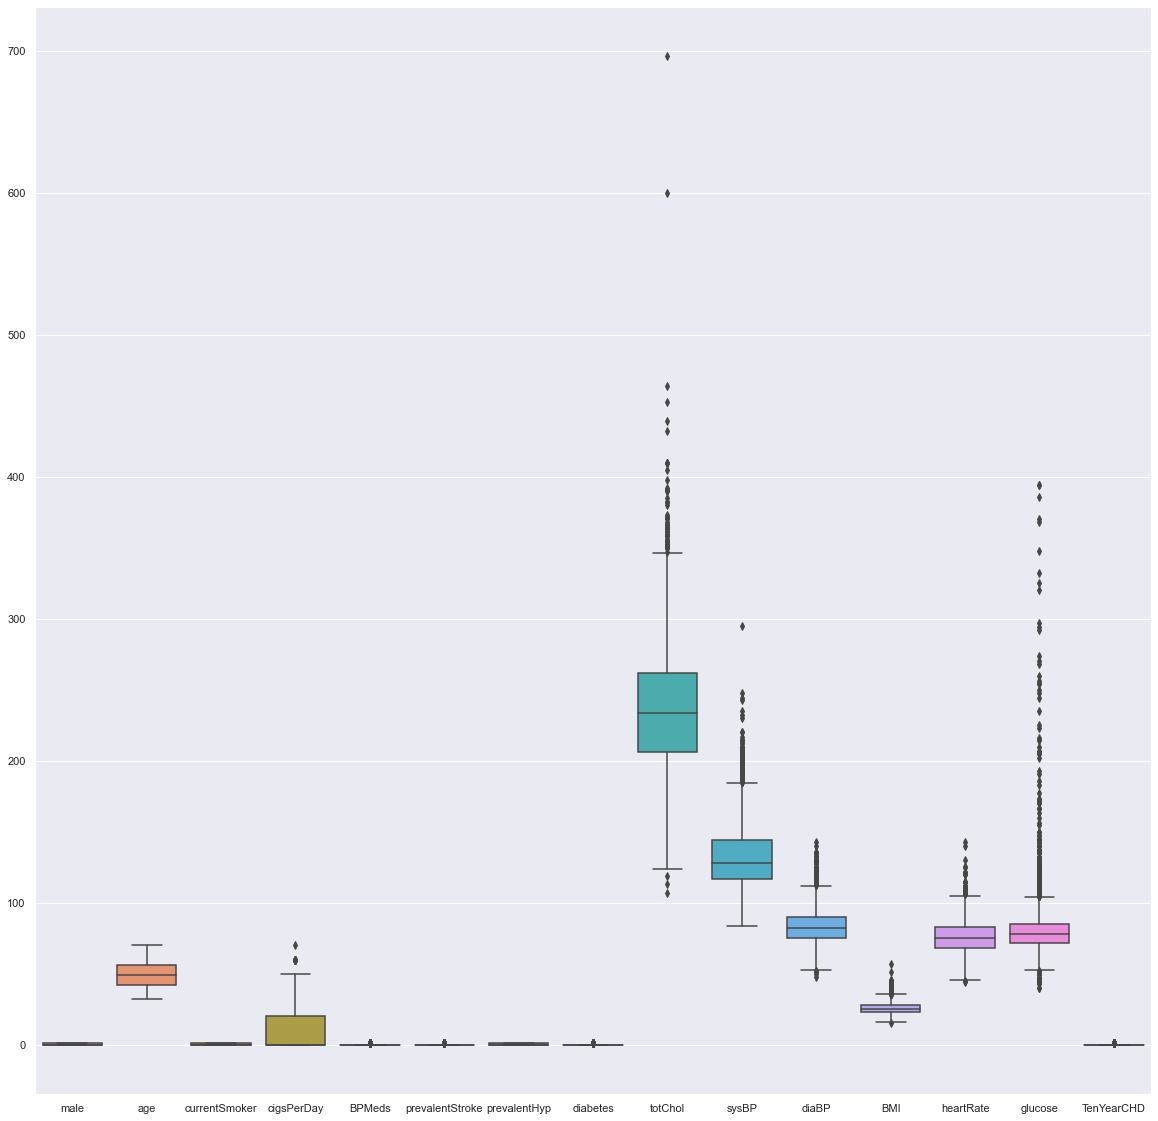

In [24]:
# To check for outliers, we are plotting a box-whisker plot.

plt.figure(figsize=(20,20), facecolor='w')
sns.boxplot(data = heart_df)
plt.show()

- We have outliers in the following columns: cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose
  Out of them we have extremities in 'totChol' and 'sysBP' the rest of the outliers are close to the upper whisker   which are considerable.
- As the assumption states that there should be no outliers in our data. We will try to manipulate the data to fit in our range.

In [25]:
# Finding the maximum values for 'totChol' and 'sysBP'

print(heart_df['totChol'].max())
print(heart_df['sysBP'].max())

696.0
295.0


In [26]:
heart1_df = heart_df[heart_df['totChol'] < 600.0]
heart1_df = heart_df[heart_df['sysBP'] < 295.0]
heart1_df.shape

(4237, 15)

#### Scaling of the data

We are using "Standardization technique" to scale our data. It means that our values are centered around mean with a unit standard deviation.
To scale our data we have to split our data into 'X' and 'Y' variables. X has all the independant variables and Y has dependant variable(TenYearCHD) 

In [27]:
# Splitting the data into X and Y variables

x = heart1_df.values[:,0:-1]
Y = heart1_df.values[:,-1]

In [28]:
# Scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

print(x)

[[ 1.15295352 -1.23482032 -0.98850132 ...  0.28844861  0.34311023
  -0.20146144]
 [-0.86733765 -0.41795063 -0.98850132 ...  0.72129333  1.59075704
  -0.24519726]
 [ 1.15295352 -0.18455928  1.01163244 ... -0.11242463 -0.07277204
  -0.50761222]
 ...
 [-0.86733765 -0.18455928  1.01163244 ... -0.93384587  0.67581605
   0.192161  ]
 [-0.86733765 -0.65134197  1.01163244 ... -1.63229985  0.84216896
  -0.15772561]
 [-0.86733765  0.2822234  -0.98850132 ... -1.06419115  0.34311023
   1.11061334]]


In [29]:
# Checking the data type of our Y variable

Y.dtype

dtype('float64')

In [30]:
# Changing data type of Y since it is a categorical variable

Y = Y.astype(int)

### Train and Test

In [31]:
# Split the data into test and train in 80/20 ratio

x_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.20, random_state=10)

<AxesSubplot:ylabel='count'>

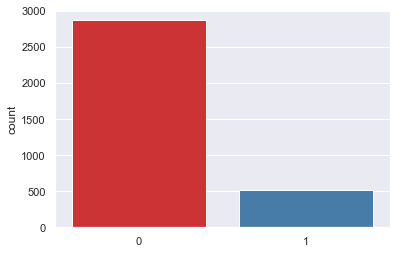

In [32]:
# Check if the training dataset is imbalanced

sns.countplot(Y_train)

<AxesSubplot:ylabel='count'>

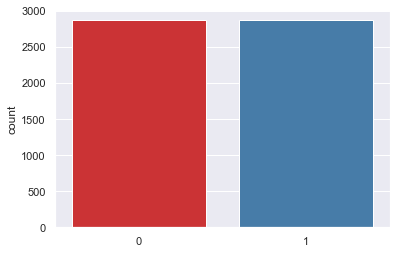

In [33]:
# Apply Random oversampling to balance the dataset
over = RandomOverSampler(sampling_strategy=1, random_state=42)
X_train, Y_train = over.fit_resample(x_train, Y_train)
#df_sampled_final = pd.DataFrame(X_train, columns = x_train.columns)
sns.countplot(Y_train)

#### Logistic regression

In [34]:
# Logistic regression

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train,Y_train)
Y_pred = lr_classifier.predict(X_test)

# Generating confusion matrix, accuracy score and classification report to check score of our prediction.

cfm_LR = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(cfm_LR)

print("\n Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_LR = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_LR)

Confusion Matrix:
[[483 243]
 [ 41  81]]

 Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.67      0.77       726
           1       0.25      0.66      0.36       122

    accuracy                           0.67       848
   macro avg       0.59      0.66      0.57       848
weighted avg       0.83      0.67      0.71       848

Accuracy of the model:  0.6650943396226415


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

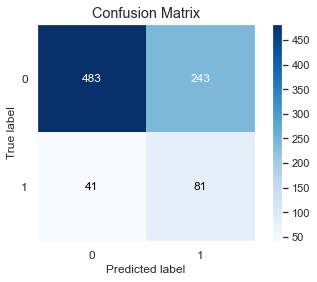

In [35]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred)

#### Decision Tree Classification

In [36]:
DT_Classifier = DecisionTreeClassifier(criterion = "gini", random_state = 10)
DT_Classifier.fit(X_train,Y_train)
Y_pred = DT_Classifier.predict(X_test)

cfm_DT = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix: ")
print(cfm_DT)
print("\n Classification report: ")
print(classification_report(Y_test,Y_pred))

acc_DT=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_DT)

Confusion Matrix: 
[[616 110]
 [ 97  25]]

 Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       726
           1       0.19      0.20      0.19       122

    accuracy                           0.76       848
   macro avg       0.52      0.53      0.53       848
weighted avg       0.77      0.76      0.76       848

Accuracy of the model:  0.7558962264150944


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

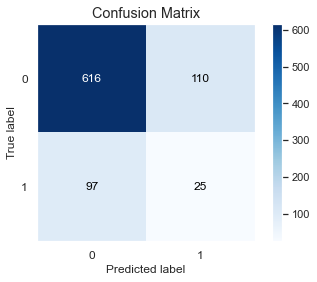

In [37]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred)

#### Random Forest Classifier

In [38]:
RF_classifier = RandomForestClassifier(n_estimators=101, random_state=10)
RF_classifier = RF_classifier.fit(X_train,Y_train)
Y_pred = RF_classifier.predict(X_test)

cfm_RF = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix: ")
print(cfm_RF)
print()
print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_RF = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_RF)

Confusion Matrix: 
[[709  17]
 [104  18]]

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       726
           1       0.51      0.15      0.23       122

    accuracy                           0.86       848
   macro avg       0.69      0.56      0.58       848
weighted avg       0.82      0.86      0.82       848

Accuracy of the model:  0.8573113207547169


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

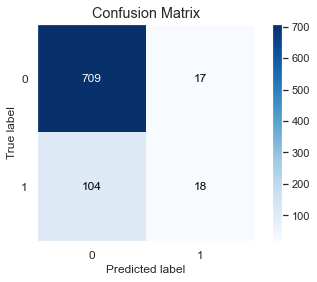

In [39]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred)

#### KNN Classification

In [40]:
KNN_classifier= KNeighborsClassifier(n_neighbors= int(np.sqrt(len(X_train))),
                                    metric= 'euclidean')
KNN_classifier.fit(X_train,Y_train)
Y_pred= KNN_classifier.predict(X_test)

cfm_KNN = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix: ")
print(cfm_KNN)
print()
print("\n Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_KNN=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_KNN)

Confusion Matrix: 
[[480 246]
 [ 50  72]]


 Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.66      0.76       726
           1       0.23      0.59      0.33       122

    accuracy                           0.65       848
   macro avg       0.57      0.63      0.55       848
weighted avg       0.81      0.65      0.70       848

Accuracy of the model:  0.6509433962264151


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

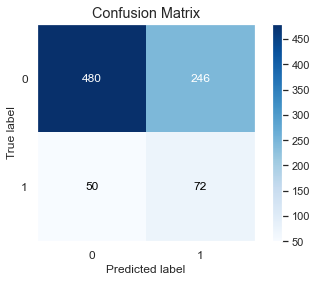

In [41]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred)

#### SVM (Support Vector Machine) Classification 

In [42]:
# SVM with Gamma = 0.1, and C = 1.0

svc_model= SVC(kernel = "rbf",gamma = 0.1, C = 1.0)
svc_model.fit(X_train,Y_train)
Y_pred= svc_model.predict(X_test)

print(classification_report(Y_test, Y_pred))

acc_SV= svc_model.score(X_train, Y_train)
print("Accuracy of the SVM model with Gamma = 0.1, and C = 1.0: ", acc_SV)

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       726
           1       0.25      0.54      0.34       122

    accuracy                           0.70       848
   macro avg       0.58      0.64      0.58       848
weighted avg       0.81      0.70      0.74       848

Accuracy of the SVM model with Gamma = 0.1, and C = 1.0:  0.7770223152022315


In [43]:
# SVM with Gamma = 0.01

svc_model= SVC(kernel = "rbf", gamma = 0.01, C = 1.0)
svc_model.fit(X_train,Y_train)
Y_pred= svc_model.predict(X_test)

print(classification_report(Y_test, Y_pred))

acc_SV1= svc_model.score(X_train, Y_train)
print("Accuracy of the SVM model with Gamma = 0.01, and C = 1.0: ", acc_SV1)

              precision    recall  f1-score   support

           0       0.93      0.66      0.77       726
           1       0.25      0.69      0.37       122

    accuracy                           0.66       848
   macro avg       0.59      0.67      0.57       848
weighted avg       0.83      0.66      0.71       848

Accuracy of the SVM model with Gamma = 0.01, and C = 1.0:  0.6795676429567643


In [44]:
# SVM with Gamma = 0.001

svc_model= SVC(kernel = "rbf", gamma = 0.001, C = 1.0)
svc_model.fit(X_train,Y_train)
Y_pred= svc_model.predict(X_test)

print(classification_report(Y_test, Y_pred))

acc_SV1= svc_model.score(X_train, Y_train)
print("Accuracy of the SVM model with Gamma = 0.001, and C = 1.0: ", acc_SV1)

              precision    recall  f1-score   support

           0       0.92      0.67      0.78       726
           1       0.25      0.66      0.36       122

    accuracy                           0.67       848
   macro avg       0.59      0.66      0.57       848
weighted avg       0.82      0.67      0.72       848

Accuracy of the SVM model with Gamma = 0.001, and C = 1.0:  0.6739888423988842


In [45]:
# SVM where gamma = 0.1 and c = 80

svc_model= SVC(kernel = "rbf", gamma = 0.1, C = 80)
svc_model.fit(X_train, Y_train)
Y_pred= svc_model.predict(X_test)

print(classification_report(Y_test, Y_pred))

acc_SVr= svc_model.score(X_train, Y_train)
print("Accuracy of the SVM model with Gamma = 0.1, and C = 80: ",acc_SVr)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       726
           1       0.23      0.32      0.26       122

    accuracy                           0.74       848
   macro avg       0.55      0.57      0.55       848
weighted avg       0.78      0.74      0.76       848

Accuracy of the SVM model with Gamma = 0.1, and C = 80:  0.949442119944212


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

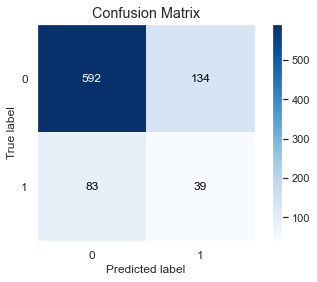

In [46]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred)

- In order to get highest accuracy, tried running the model with multiple versions of parameters gamma and regularization parameter.
- SVM classification model shows highest accuracy when gamma is 0.1 and regularization parameter is 80. 

In [47]:
# Evaluate the models

model_eval = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour',
                                   'SVM','Decision Tree','Random Forrest'], 
                         'Accuracy': [acc_LR*100, acc_KNN*100, 
                                      acc_SVr*100,acc_DT*100,acc_RF*100]})
model_eval

Model   Accuracy
0  Logistic Regression  66.509434
1  K-Nearest Neighbour  65.094340
2                  SVM  94.944212
3        Decision Tree  75.589623
4       Random Forrest  85.731132

### Conclusions
- The strongest positive correlations of TenYearCHD are with age and sysBP.
- Performed Standardization technique to scale the data before running it through the ML algorithms. 
- Random oversampling technique helped overcome the Imbalanced datasets challenge. 
- Based on the accuracy of the implemented classification models to predict TenYearCHD, SVM classification model shows highest accuracy. 